In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
sms=pd.read_csv('C:/Users/Sahithi/Downloads/spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"label","v2":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print(" no of rows", len(sms))

 no of rows 5572


In [5]:
sms.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
sms['length']=sms['text'].apply(len)
sms.head()


,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

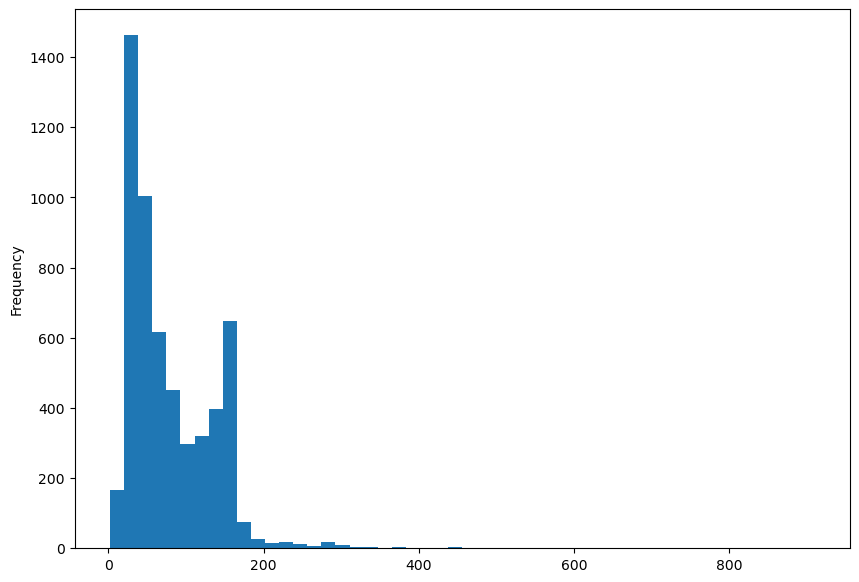

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sms['length'].plot(bins=50, kind='hist',figsize=(10,7))


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

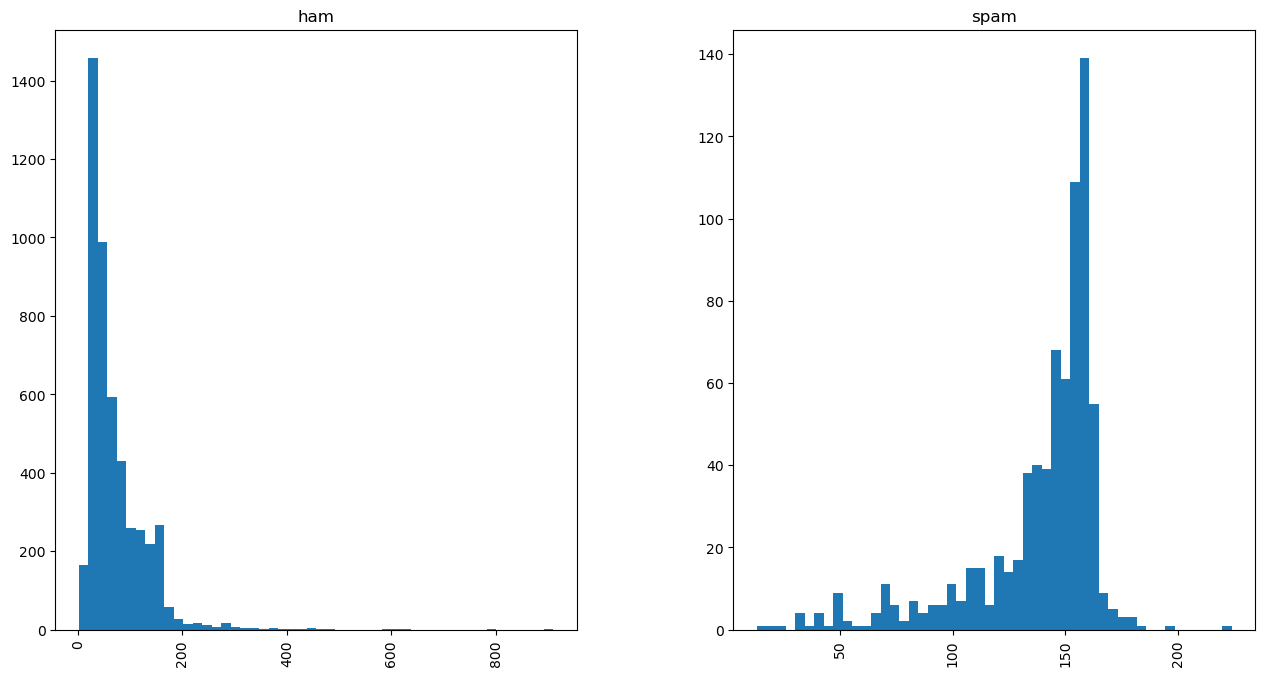

In [9]:
sms.hist(column='length', by='label', bins=50, figsize=(15,8))

In [10]:
sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count=CountVectorizer()
input=['REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode']

text=count.fit_transform(sms['text'])

x_train, x_test, y_train, y_test= train_test_split(text, sms['label'], test_size=0.20, random_state=1)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [12]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8672)
(1115, 8672)


In [13]:
pip install scikit-learn

In [24]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier()
y_train=np.array(y_train,dtype=int)

model.fit(x_train, y_train)

MLPClassifier()

In [25]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Multinomial NB")
prediction = np.array(prediction, dtype=int)
y_test = np.array(y_test, dtype=int)

# Print the shapes to debug
print("Shape of y_test:", y_test.shape)
print("Shape of prediction:", prediction.shape)
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Shape of y_test: (1115,)
Shape of prediction: (1115,)
Accuracy score: 0.9937219730941704
Precision score: 1.0
Recall score: 0.9496402877697842
F1 score: 0.974169741697417


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB


ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MLP Classifier")
prediction = np.array(prediction, dtype=int)
y_test = np.array(y_test, dtype=int)

# Print the shapes to debug
print("Shape of y_test:", y_test.shape)
print("Shape of prediction:", prediction.shape)
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

MLP Classifier
Shape of y_test: (1115,)
Shape of prediction: (1115,)
Accuracy score: 0.9937219730941704
Precision score: 1.0
Recall score: 0.9496402877697842
F1 score: 0.974169741697417


In [29]:
input

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [31]:
model.predict(input)

array([0])

In [32]:
data=sms['text']
input="To get 2.50 pounds free call credit and details of great offers pls reply 2 this text"

In [33]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [34]:
data.loc[len(data.index)]="hfwe ewfjb in jd eif"

In [35]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572                                 hfwe ewfjb in jd eif
Name: text, Length: 5573, dtype: object

In [36]:
text=count.fit_transform(data)

In [37]:
text

<5573x8675 sparse matrix of type '<class 'numpy.int64'>'
	with 73921 stored elements in Compressed Sparse Row format>

In [39]:
input=text[5572]

In [43]:
# Assuming model and x_train are defined and properly prepared
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=1)
model.fit(x_train, y_train)  # Ensure model is fitted with training data

# Assuming input needs adjustment to match the expected number of features
# Adjust input to have 8672 features
adjusted_input = input[:, :8672]  # Keep only the first 8672 features

# Now make predictions with adjusted_input
predictions = model.predict(adjusted_input)
print("Predictions:", predictions)


Predictions: [0]
